# 卷积神经网络

In [ ]:
import torch as torch
import torch.nn as nn  
from torch.autograd import Variable
import torch.utils.data as Data  
import torchvision  
import matplotlib.pyplot as plt  
import numpy as np

# 定义超参数
EPOCH = 3
BATCH_SIZE = 50  
LR = 0.001  
DOWNLOAD_MNIST = True   

# 获取训练集 dataset
train_data = torchvision.datasets.MNIST(  
             root='./mnist/',
             train=True,
             transform=torchvision.transforms.ToTensor(),
             download=DOWNLOAD_MNIST,  
             )  


In [ ]:
print(train_data.data.size())  
print(train_data.targets.size())
# 输出照片比对
for i in range(1,4):
    plt.imshow(train_data.data[i].numpy(), cmap='gray')  
    plt.title('%i' % train_data.targets[i])  
    plt.show()  

# 加载train_loader
train_loader = Data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE)
# 用 DataLoader 加载数据集
# torch.utils.data.DataLoader(dataset = train_data, batch_size=1,shuffle=False, sampler=None, num_workers=0, pin_memory=False, drop_last=False)

In [13]:
# 获取测试集
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)  
test_x = Variable(torch.unsqueeze(test_data.data, dim=1)).type(torch.FloatTensor)
test_y = test_data.targets

In [19]:
# 定义网络结构

# 1.需要继承 Module
class CNN(nn.Module):  

    def __init__(self):  

        # 2.需要调用父类构造方法
        super(CNN, self).__init__()  

        self.conv1 = nn.Sequential(  

                     nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5,  

                               stride=1, padding=2),
                    # 3.pytorch中 激活函数 ReLU 也是一层layer                    
                     nn.ReLU(),  

                     nn.MaxPool2d(kernel_size=2) # (16,14,14)  

                     )  

        self.conv2 = nn.Sequential( # (16,14,14)  

                     nn.Conv2d(16, 32, 5, 1, 2), # (32,14,14)  

                     nn.ReLU(),  

                     nn.MaxPool2d(2) # (32,7,7)  

                     )  
        # 全连接，softmax输出         
        self.out = nn.Linear(32*7*7, 10)  
        
    # 4.需要实现forward()方法，反向传播只需要调用 Variable.backward()    
    def forward(self, x):  
        x = self.conv1(x)  
        x = self.conv2(x)  
        x = x.view(x.size(0), -1) # 将（batch，32,7,7）展平为（batch，32*7*7）  
        output = self.out(x)  
        return output  

In [21]:
# 打印网络的结构参数
cnn = CNN()  
print(cnn)  
params = list(cnn.parameters())
print(len(params))
print(params[0].size())

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
6
torch.Size([16, 1, 5, 5])


In [23]:
# 优化方法 和 损失函数

# torch.optim 更新方法 SGD, Nesterov-SGD, Adam, RMSProp 等
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  
loss_function = nn.CrossEntropyLoss()  

In [ ]:
for epoch in range(EPOCH):  
    for step, (x, y) in enumerate(train_loader):  
        b_x = Variable(x)  
        b_y = Variable(y)  
        output = cnn(b_x)  
        loss = loss_function(output, b_y)  
        
        optimizer.zero_grad()
        loss.backward()  
        optimizer.step()  
        
        if step % 100 == 0:  
            test_output = cnn(test_x)  
            pred_y = torch.max(test_output, 1)[1].data.squeeze()  
            accuracy = sum(pred_y == test_y) / test_y.size(0)  
            print('Epoch:', epoch, '|Step:', step, '|train loss:%.4f'%loss.item(), '|test accuracy:%.4f'%accuracy)  
test_output =cnn(test_x[:20])  
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()  
print(pred_y, 'prediction number')  
print(test_y[:20].numpy(), 'real number')

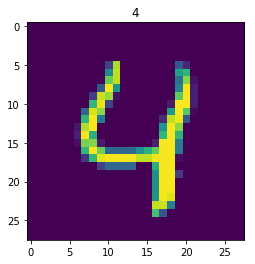

In [72]:
index = 4

test_img = test_x[index][0].numpy()
test_img = test_img.astype(np.uint8)

plt.imshow(test_img)
plt.title('%i' % pred_y[index]) 
plt.show()  